In [235]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_data = pd.merge(mouse_drug_df, clinical_trial_df, how="outer", on=["Mouse ID"])

# Display the data table for preview
mouse_clinical_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [236]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_group = mouse_clinical_data.groupby(['Drug', 'Timepoint'])
tumor_volume = mean_tumor_group['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_volume})

# Preview DataFrame
mean_tumor_final = mean_tumor_df.reset_index()

mean_tumor_final.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [237]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
serror_tumor_group = mouse_clinical_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
serror_tumor_df = pd.DataFrame(serror_tumor_group)

# Preview DataFrame
serror_tumor_final = serror_tumor_df.reset_index()

serror_tumor_final.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [238]:
# Minor Data Munging to Re-Format the Data Frames
meantumor_group = pd.pivot_table(mean_tumor_df, index = ['Timepoint'], columns = ['Drug'], values = 'Tumor Volume (mm3)')
serror_tumor_group = pd.pivot_table(serror_tumor_df, index = ['Timepoint'], columns = ['Drug'], values = 'Tumor Volume (mm3)' )

# Preview that Reformatting worked
meantumor_group.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


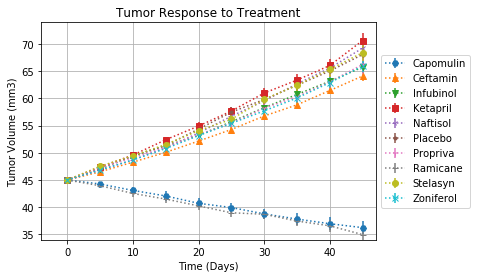

In [253]:
fig, tumor_chart = plt.subplots()

# Add Error bars
x_axis = np.arange(0, 50, 5)
drug = list(meantumor_group)
markers = ['H', '^', 'v', 's', '3', '.', '1', '_', 'o', 'x']

for i in range(len(drug)):
    tumor_chart.errorbar(x_axis, meantumor_group[(drug[i])], yerr = serror_tumor_group[(drug[i])], 
                         fmt="o", linestyle='dotted', marker = markers[i])
    
# Set the xlabel and ylabel using class methods
tumor_chart.set_xlabel("Time (Days)")
tumor_chart.set_ylabel("Tumor Volume (mm3)")
tumor_chart.set_title("Tumor Response to Treatment")

# Set your x and y limit. Also set grid lines and legend
tumor_chart.set_xlim(-4, 47)
tumor_chart.set_ylim(34, 74)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
tumor_chart.grid()

# Save the Figure
plt.savefig("images/tumor_response.png")

In [240]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [241]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastic_group = mouse_clinical_data.groupby(['Drug', 'Timepoint'])
metsite_mean = metastic_group['Metastatic Sites'].mean()

# Convert to DataFrame
metastic_df = pd.DataFrame({"Metastatic Sites": metsite_mean})

# Preview DataFrame
metastic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [242]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
serror_metsite_group = mouse_clinical_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
serror_metsite_df = pd.DataFrame(serror_metsite_group)

# Preview DataFrame
serror_metsite_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [243]:
# Minor Data Munging to Re-Format the Data Frames
metsite_group = pd.pivot_table(metastic_df, index = ['Timepoint'], columns = ['Drug'], values = 'Metastatic Sites')
semetsite_group = pd.pivot_table(serror_metsite_df, index = ['Timepoint'], columns = ['Drug'], values = 'Metastatic Sites' )

# Preview that Reformatting worked
metsite_group.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


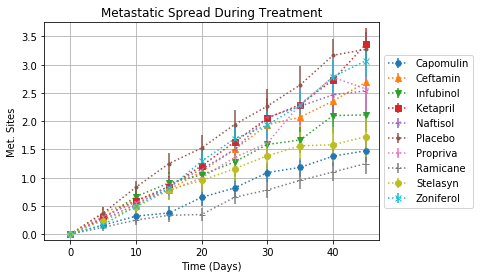

In [252]:
fig, metastatic_chart = plt.subplots()

# Add Error bars
x_axis = np.arange(0, 50, 5)
drug = list(metsite_group)
markers = ['H', '^', 'v', 's', '3', '.', '1', '_', 'o', 'x']

for i in range(len(drug)):
    metastatic_chart.errorbar(x_axis, metsite_group[(drug[i])], yerr = semetsite_group[(drug[i])], 
                         fmt="o", linestyle='dotted', marker = markers[i])
    
# Set the xlabel and ylabel using class methods
metastatic_chart.set_xlabel("Time (Days)")
metastatic_chart.set_ylabel("Met. Sites")
metastatic_chart.set_title("Metastatic Spread During Treatment")

# Set your x and y limit. Also set grid lines and legend
metastatic_chart.set_xlim(-4, 47)
metastatic_chart.set_ylim(-0.1, 3.75)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
metastatic_chart.grid()

# Save the Figure
plt.savefig("images/metastatic_response.png")

# Show the Figure
plt.show()

## Survival Rates

In [245]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_group = mouse_clinical_data.groupby(['Drug', 'Timepoint'])
mouse_num = mean_tumor_group['Mouse ID'].count()

# Convert to DataFrame
mouse_num_df = pd.DataFrame({'Mouse Count': mouse_num})

# Preview DataFrame
mouse_num_final = mouse_num_df.reset_index()

mouse_num_final.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [246]:
# Minor Data Munging to Re-Format the Data Frames
mouse_group = pd.pivot_table(mouse_num_df, index = ['Timepoint'], columns = ['Drug'], values = 'Mouse Count')

# Preview that Reformatting worked
mouse_group.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


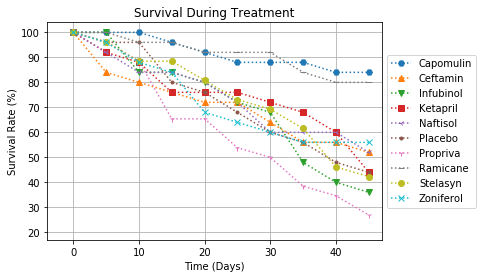

In [254]:
# Generate the Plot (Accounting for percentages)
fig, survival_chart = plt.subplots()

# Add Error bars
x_axis = np.arange(0, 50, 5)
drug = list(mouse_group)
markers = ['H', '^', 'v', 's', '3', '.', '1', '_', 'o', 'x']

for i in range(len(drug)):
    y_axis = (mouse_group[(drug[i])]/mouse_group[(drug[i])].iloc[0])*100
    
    survival_chart.errorbar(x_axis, y_axis, fmt="o", linestyle='dotted', marker = markers[i])
    
# Set the xlabel and ylabel using class methods
survival_chart.set_xlabel("Time (Days)")
survival_chart.set_ylabel("Survival Rate (%)")
survival_chart.set_title("Survival During Treatment")

# Set your x and y limit. Also set grid lines and legend
survival_chart.set_xlim(-4, 47)
survival_chart.set_ylim(17, 104)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
survival_chart.grid()

# Save the Figure
plt.savefig("images/mouse_survival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [248]:
# Calculate the percent changes for each drug
tumor_vol_pchange = ((meantumor_group.iloc[9]-meantumor_group.iloc[0])/meantumor_group.iloc[0])*100

# Display the data to confirm
tumor_vol_pchange

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

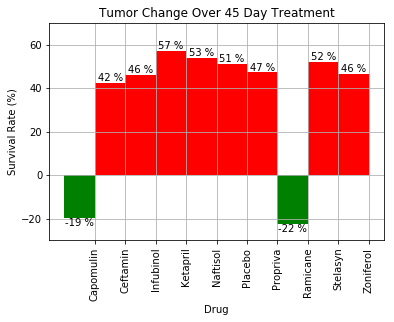

In [251]:
# Store all Relevant Percent Changes into a Tuple
vol_pchange = tuple(tumor_vol_pchange)

# Splice the data between passing and failing drugs
drug = list(meantumor_group)
x_axis = np.arange(0, 100*len(vol_pchange), 100)
bwidth = -100

for i in range(len(x_axis)):
    if vol_pchange[i] < 0:
        bar1 = plt.bar(x_axis[i], vol_pchange[i], color='g', width = bwidth, align="edge")
        
        # Use functions to label the percentages of changes
        for rect in bar1:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height,f'{int(height)} %', ha='center', va='top')
        
    else:
        bar2 = plt.bar(x_axis[i], vol_pchange[i], color='r', width = bwidth, align="edge")
        
        # Use functions to label the percentages of changes
        for rect in bar2:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2.0, height,f'{int(height)} %', ha ='center', va='bottom')        

# Orient widths. Add labels, tick marks, etc. 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug, rotation='vertical')
plt.xlabel("Drug")
plt.ylabel("Survival Rate (%)")
plt.title("Tumor Change Over 45 Day Treatment")

plt.xlim(-150, 100*len(x_axis)-50)
plt.ylim(-30, 70)

plt.grid()

# Save the Figure
plt.savefig("images/tumor_change.png")

# Show the Figure
fig.show()